In [1]:
import time
import random
from matplotlib import pyplot as plt

# 列表、时间与性能

在这个 notebook 中，我们将要探索列表的性能。具体来说，我们将要看一看在列表中执行**归属查询**所需的时间是如何受到列表的各种属性的影响。 “归属查询”就是你在编写代码时所要做的事情：

In [2]:
my_list = [1,2,3]
if 3 in my_list:
    # we just checked my_list for membership
    # of the element 3 

SyntaxError: unexpected EOF while parsing (<ipython-input-2-1076ea899db5>, line 4)

让我们在代码中探索以下两个问题：

1. 当列表中的元素为IS时，该元素的位置（靠近开始位置还是靠近结束位置）是否会影响执行归属查询所需的时间？

2. 当一个元素不在列表中时，列表大小是否会影响执行归属查询所需的时间？

我们的发现将会激发一场更深入的讨论，即列表与其他数据结构之间是如何权衡的。

In [3]:
# before we continue, make sure you understand 
# what we mean by "testing for membership" in a list. 

L = [1,2,3]
2 in L

True

In [4]:
L = [1,2,3]
4 in L

False

## 问题1
> 列表中的位置是否影响执行归属测试所需的时间？

首先，我们需要弄清楚如何处理这些计时...

In [5]:
# let's make a small list to begin with
L = list(range(10))
print(L)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [6]:
# now let's time how long it takes to check for 
# membership of the very first element (0)...

element = 0

start_time = time.clock()

element in L     # this line of code looks weird 
                 # but it's valid python!

end_time =   time.clock()

# make sure you understand why the following code makes sense.
duration_in_seconds = end_time - start_time
milliseconds = duration_in_seconds * 1000

print(milliseconds, "milliseconds to find 0 in list")

0.062000000000006494 milliseconds to find 0 in list


In [7]:
# Run the above code a few times. You should notice that the time
# can change quite a bit. What we actually want is to conduct
# this experiment a bunch of times and find the average. 


L = list(range(1000)) # use a bigger list
element = 500         # look in the middle of the list
num_trials = 1000     # perform experiment many times

start = time.clock()
for _ in range(num_trials):
    element in L
end = time.clock()
secs = end-start
millis = secs * 1000
millis_per_check = millis/num_trials
print("on average, it took", millis_per_check, "ms per membership test")

on average, it took 0.009095999999999993 ms per membership test


In [8]:
# That's a useful bit of code! 
# Let's generalize it and turn it into a reusable function

def avg_millis_to_check_el_in_list(element, target_list, N=20):
    start = time.clock()
    for _ in range(N):
        element in target_list
    end = time.clock()
    return (end-start)*1000 / N

avg_millis = avg_millis_to_check_el_in_list(500, list(range(1000)))
print("on average, it took", avg_millis, "ms per membership test")

on average, it took 0.008449999999993185 ms per membership test


### 注 - 别急，慢慢来！
确保你把时间花在接下来的几个单元格上。尝试在运行代码**之前**仔细阅读代码，并尝试对将要发生的事情进行预测...

In [9]:
# now we can compare time to lookup low numbers (near the 
# beginning of the list) vs higher numbers (near the end).

# Let's use a really big list this time
list_size = 1000000
L = list(range(list_size))

# Now make three separate timings...
T_beginning = avg_millis_to_check_el_in_list(1000, L)
T_middle    = avg_millis_to_check_el_in_list(500000, L)
T_end       = avg_millis_to_check_el_in_list(999999, L)

print("T_beginning: ", T_beginning)
print("T_middle:    ", T_middle)
print("T_end:       ", T_end)

T_beginning:  0.01594999999999791
T_middle:     8.031750000000004
T_end:        15.987099999999998


太有意思了！这显然有关系。让我们看看我们是否可以深入挖掘。在列表中显示平均时间vs位置的 [散点图](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) 可能有助于我们解决问题。

In [9]:
# Making a scatter plot of position in list (X-axis)
# vs. average time to find element (y-axis)

list_size = 100000
L = list(range(list_size))

# check between start and end in increments of 10000. This will
# be our X axis too!
positions = list(range(0, list_size, 10000))

# use list comprehension to generate Y-axis data!
millis = [avg_millis_to_check_el_in_list(pos, L) for pos in positions]

# first, let's look at the raw data
print("positions checked:", positions)
print("average millis:   ", millis)

positions checked: [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000]
average millis:    [0.0004499999999962867, 0.15379999999999283, 0.3139499999999962, 0.4660999999999915, 0.6166000000000005, 0.7766999999999968, 0.928300000000004, 1.0805999999999982, 1.2410000000000032, 1.3799499999999965]


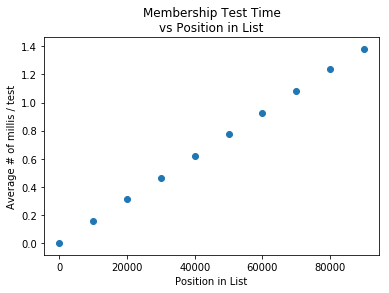

In [10]:
# now let's make the scatter plot!
X = positions 
Y = millis
plt.scatter(X, Y)
plt.title("Membership Test Time\nvs Position in List")
plt.xlabel("Position in List")
plt.ylabel("Average # of millis / test")
plt.show()

### 问题1的答案
是的! 一个元素在列表中的位置 **肯定** 会影响发现该元素存在于列表中所需的时间！

列表开头的元素可以很快找到。 列表末尾的元素则需要更长的时间。



## 问题2 

> 列表大小是否会影响某个元素不在列表中时，该元素的归属测试所需的时间？

In [11]:
# Let's jump right into writing a function

def avg_millis_to_test_for_non_existent_el(list_size, num_trials=20):
    # 1. prepare list and nonexistent element
    L = list(range(list_size))
    element = -1
    
    # 2. start the timer
    start = time.clock()
    
    # 3. repeat membership test num_trials times
    for _ in range(num_trials):
        element in L
    
    # 4. stop the timer
    end = time.clock()
    
    # 5. do the math and return the result
    millis_per_test = (end-start) * 1000 / num_trials
    return millis_per_test

In [12]:
# Let's use this function on lists of different sizes
small  = 10000
medium = 100000
large  = 1000000

T_small  = avg_millis_to_test_for_non_existent_el(small)
T_medium = avg_millis_to_test_for_non_existent_el(medium)
T_large  = avg_millis_to_test_for_non_existent_el(large)

print("T_small: ", T_small)
print("T_medium:", T_medium)
print("T_large: ", T_large)

T_small:  0.17929999999999335
T_medium: 1.5671499999999838
T_large:  15.974449999999996


我们再一次看到了这种关系...

我们再做一个散点图。

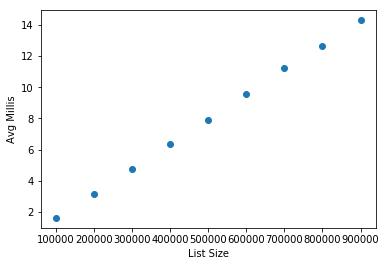

In [13]:
sizes = list(range(100000, 1000000, 100000))
times = [avg_millis_to_test_for_non_existent_el(s) for s in sizes]
plt.scatter(sizes, times)
plt.xlabel("List Size")
plt.ylabel("Avg Millis")
plt.show()

### 问题2的答案
是的! 当检查列表中元素的归属时，如果列表很大，要找出该列表中**不**存在的元素需要更长的时间。

### 接下来的步骤
你可以继续做这个练习，继续探索更多关于列表与时间的问题。 如果你继续探索并发现了有趣的内容，别忘了在小组Slack板块中与大家分享哦！

In [ ]:
# TODO (optional) - keep exploring! 